<a href="https://colab.research.google.com/github/PratyushSinha8/alpha_ai-alpha_ai_task6/blob/main/alpha_ai_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
pd.read_csv('/content/drive/MyDrive/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')

ParserError: ignored

In [4]:
file = open('/content/drive/MyDrive/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


In [5]:
processedList

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [6]:

columns = ['user', 'activity', 'time', 'x', 'y', 'z']

In [7]:
data = pd.DataFrame(data = processedList, columns = columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [8]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [38]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [39]:
data.describe()

,x,y,z
count,343416.000000,343416.000000,343416.000000
mean,1.007548,8.062965,0.306067
std,6.592155,6.624386,4.455004
min,-19.610000,-19.610000,-19.613300
25%,-2.301839,3.990000,-2.179256
50%,0.230000,8.660000,0.000000
75%,4.020000,12.530000,2.492524
max,19.570000,19.572440,19.231932


In [40]:
(data.isnull().sum()/data.shape[0])*100
#No null values

user        0.0
activity    0.0
time        0.0
x           0.0
y           0.0
z           0.0
dtype: float64

In [41]:
data['activity'].value_counts()
#The data needs to be balanced

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [42]:
data.columns

Index(['user', 'activity', 'time', 'x', 'y', 'z'], dtype='object')

In [43]:
#The distribution for each kind of rating is equal. Due to system requirements, I will downsample the dataset
walking=data[data['activity']=='Walking'].sample(n=3555)
jogging=data[data['activity']=='Jogging'].sample(n=3555)
upstairs=data[data['activity']=='Upstairs'].sample(n=3555)
downstairs=data[data['activity']=='Downstairs'].sample(n=3555)
sitting=data[data['activity']=='Sitting'].sample(n=3555)
standing=data[data['activity']=='Standing'].sample(n=3555)

In [44]:
balanced_data=pd.concat([walking, jogging, upstairs, downstairs, sitting, standing], axis=0)
balanced_data.head()

,user,activity,time,x,y,z
205468,27,Walking,11234352277000,0.84,6.78,-3.364226
229449,36,Walking,13278652631000,0.61,13.44,-1.416516
57295,33,Walking,10753662273000,-1.99,3.26,1.035146
206467,27,Walking,11284282971000,14.18,6.74,-0.340509
32949,20,Walking,1383882243000,-0.50,14.37,10.419566


In [45]:
balanced_data['activity'].value_counts()
#The data is balanced now

Downstairs    3555
Standing      3555
Jogging       3555
Walking       3555
Sitting       3555
Upstairs      3555
Name: activity, dtype: int64

In [46]:
balanced_data = balanced_data.drop(['user', 'time'], axis = 1).copy()
balanced_data.head()

,activity,x,y,z
205468,Walking,0.84,6.78,-3.364226
229449,Walking,0.61,13.44,-1.416516
57295,Walking,-1.99,3.26,1.035146
206467,Walking,14.18,6.74,-0.340509
32949,Walking,-0.50,14.37,10.419566


In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
205468,Walking,0.84,6.78,-3.364226,5
229449,Walking,0.61,13.44,-1.416516,5
57295,Walking,-1.99,3.26,1.035146,5
206467,Walking,14.18,6.74,-0.340509,5
32949,Walking,-0.50,14.37,10.419566,5


In [49]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [50]:
#Standardizing
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

In [51]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,0.124668,-0.167597,-1.185673,5
1,0.079853,0.980936,-0.696440,5
2,-0.426749,-0.774630,-0.080621,5
3,2.723927,-0.174495,-0.426164,5
4,-0.136427,1.141317,2.276597,5
...,...,...,...,...
21325,-0.315686,0.289402,0.199919,3
21326,0.005811,0.348036,-0.716967,3
21327,-0.294253,0.322168,0.131495,3
21328,0.027244,0.348036,-0.706703,3


In [53]:
#Preparing the frame

import scipy.stats as stats

Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

In [54]:
def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the most often used label in this segment
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

In [56]:
X, y = get_frames(scaled_X, frame_size, hop_size)
X.shape, y.shape

((532, 80, 3), (532,))

In [57]:
(3555*6)/40

533.25

In [59]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((425, 80, 3), (107, 80, 3))

In [60]:

X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [61]:

X_train = X_train.reshape(425, 80, 3, 1)
X_test = X_test.reshape(107, 80, 3, 1)

In [62]:
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

In [63]:
#2D CNN Model
model = Sequential()
model.add(Conv2D(16, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [64]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [65]:
history = model.fit(X_train, y_train, epochs = 10, validation_data= (X_test, y_test), verbose=1)

Epoch 1/10
14/14 [==============================] - 1s 18ms/step - loss: 1.6479 - accuracy: 0.2635 - val_loss: 1.4016 - val_accuracy: 0.4673
Epoch 2/10
14/14 [==============================] - 0s 8ms/step - loss: 1.2513 - accuracy: 0.5506 - val_loss: 0.9979 - val_accuracy: 0.7664
Epoch 3/10
14/14 [==============================] - 0s 8ms/step - loss: 0.9077 - accuracy: 0.6988 - val_loss: 0.6920 - val_accuracy: 0.7757
Epoch 4/10
14/14 [==============================] - 0s 9ms/step - loss: 0.6630 - accuracy: 0.7576 - val_loss: 0.4742 - val_accuracy: 0.8318
Epoch 5/10
14/14 [==============================] - 0s 8ms/step - loss: 0.4559 - accuracy: 0.8376 - val_loss: 0.3341 - val_accuracy: 0.8785
Epoch 6/10
14/14 [==============================] - 0s 8ms/step - loss: 0.3763 - accuracy: 0.8588 - val_loss: 0.3182 - val_accuracy: 0.9065
Epoch 7/10
14/14 [==============================] - 0s 8ms/step - loss: 0.3072 - accuracy: 0.8894 - val_loss: 0.2659 - val_accuracy: 0.9346
Epoch 8/10
14/14 [=

In [66]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

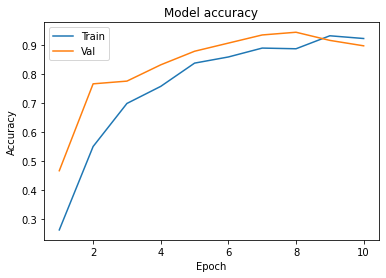

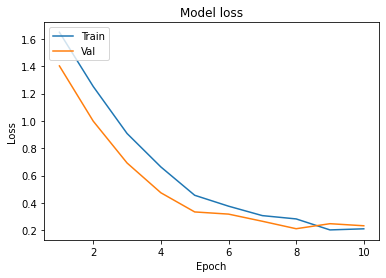

In [67]:
plot_learningCurve(history, 10)

In [68]:
#Confusion Matrix

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [77]:
y_pred = model.predict(X_test)
classes_x=np.argmax(y_pred,axis=1)

In [79]:
classes_x

array([4, 2, 2, 1, 1, 1, 5, 5, 2, 4, 3, 2, 0, 2, 3, 2, 1, 1, 2, 5, 4, 5,
       5, 1, 4, 5, 5, 3, 3, 1, 0, 0, 4, 5, 2, 5, 2, 5, 1, 2, 2, 1, 4, 0,
       1, 0, 2, 3, 3, 3, 2, 4, 5, 4, 4, 3, 3, 4, 3, 0, 0, 4, 1, 0, 1, 2,
       1, 0, 3, 3, 3, 5, 4, 4, 4, 4, 5, 2, 5, 5, 4, 3, 3, 4, 4, 3, 0, 3,
       5, 5, 5, 4, 2, 1, 0, 4, 3, 4, 0, 1, 2, 5, 0, 5, 1, 0, 2])

In [80]:
y_test

array([4, 2, 2, 1, 1, 1, 5, 4, 2, 4, 3, 2, 0, 2, 3, 2, 1, 1, 2, 5, 4, 5,
       5, 1, 1, 0, 5, 3, 3, 1, 0, 0, 4, 5, 2, 5, 2, 1, 1, 2, 2, 1, 4, 0,
       4, 0, 2, 3, 3, 3, 2, 4, 5, 0, 4, 3, 3, 4, 3, 0, 0, 1, 1, 0, 1, 2,
       1, 0, 3, 3, 3, 5, 4, 4, 4, 4, 5, 2, 5, 5, 4, 3, 3, 4, 4, 3, 0, 3,
       5, 5, 5, 0, 2, 1, 4, 0, 3, 0, 0, 1, 2, 5, 0, 5, 1, 0, 2])

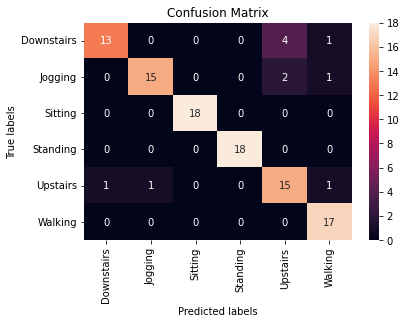

In [114]:
import seaborn as sns

ax= plt.subplot()
mat = confusion_matrix(y_test, classes_x)
sns.heatmap(mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
plt.xticks(rotation=90)
plt.yticks(rotation=0)
ax.xaxis.set_ticklabels(label.classes_); ax.yaxis.set_ticklabels(label.classes_);